In [ ]:
!pip install qiskit

     |████████████████████████████████| 6.0MB 14.5MB/s 
     |████████████████████████████████| 18.0MB 231kB/s 
     |████████████████████████████████| 235kB 59.0MB/s 
     |████████████████████████████████| 215kB 53.3MB/s 
     |████████████████████████████████| 2.1MB 38.1MB/s 
     |████████████████████████████████| 1.5MB 33.3MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 194kB 44.0MB/s 
     |████████████████████████████████| 112kB 47.3MB/s 
     |████████████████████████████████| 614kB 35.8MB/s 
     |████████████████████████████████| 3.2MB 36.2MB/s 
     |████████████████████████████████| 6.3MB 32.4MB/s 
  Created wheel for qiskit: filename=qiskit-0.26.2-cp37-none-any.whl size=10491 sha256=938a68eae297c0d3ed016ab50ed6996f7c73c766851b97a48900c6dd0a20a90c
  Stored in directory: /root/.cache/pip/wheels/89/89/34/524839952d5a58a7be9789e580bfc1ca883bf6579152444568
  Created wheel for python-constraint: filename=python_constraint-1.4.0

In [ ]:
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA 
from qiskit.circuit.library import TwoLocal
# opflow is Qiskit's module for creating operators like yours
from qiskit import *
from qiskit.opflow import OperatorBase
from qiskit.opflow import Z, X, I  # Pauli Z, X matrices and identity
import pylab
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def store_intermediate_result(eval_count, parameters, mean, std):
  counts.append(eval_count)
  values.append(mean)

def get_gradient(values, counts):
    rvalues = []
    rcounts = []
    for i in range(1, len(values)):
        rvalues += [ (values[i - 1] - values[i]) ]
    rcounts = [ i for i in range(len(rvalues)) ]
    return rvalues, rcounts

def get_absolute(values):
    return [ (v if v > 0 else -v) for v in values]


In [ ]:
# J = 1.0
counts = []
values = []

H =   (504.0 * I^I^I^I^I^I^I^Z) + (1008.0 * I^I^I^I^I^I^Z^I) + (2016.0 * I^I^I^I^I^Z^I^I) + (504.0 * I^I^I^I^Z^I^I^I) + (1143.7999999999997 * I^I^I^Z^I^I^I^I) + (2287.6 * I^I^Z^I^I^I^I^I) + (4575.200000000001 * I^Z^I^I^I^I^I^I) + (1143.7999999999997 * Z^I^I^I^I^I^I^I) + (98.0 * I^I^I^I^I^I^Z^Z) + (196.0 * I^I^I^I^I^Z^I^Z) + (392.0 * I^I^I^I^I^Z^Z^I) + (49.0 * I^I^I^I^Z^I^I^Z) + (98.0 * I^I^I^I^Z^I^Z^I) + (196.0 * I^I^I^I^Z^Z^I^I) + (93.1 * I^I^Z^Z^I^I^I^I) + (186.2 * I^Z^I^Z^I^I^I^I) + (372.4 * I^Z^Z^I^I^I^I^I) + (46.55 * Z^I^I^Z^I^I^I^I) + (93.1 * Z^I^Z^I^I^I^I^I) + (186.2 * Z^Z^I^I^I^I^I^I)

# you can swap this for a real quantum device and keep the rest of the code the same!
# backend = AerSimulator(method='matrix_product_state')

backend = QasmSimulator()

# COBYLA usually works well for small problems like this one
optimizer = COBYLA(maxiter=2000)

# EfficientSU2 is a standard heuristic chemistry ansatz from Qiskit's circuit library
ansatz = TwoLocal(num_qubits=8, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
# set the algorithm
vqe = VQE(ansatz, optimizer, quantum_instance=backend, callback=store_intermediate_result)

#run it with the Hamiltonian we defined above
result = vqe.compute_minimum_eigenvalue(H)  

#print the result (it contains lot's of information)
print(result) 

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 205,
    'eigenstate': {   '11011111': 0.03125,
                      '11110110': 0.04419417382415922,
                      '11110111': 0.1875,
                      '11111010': 0.03125,
                      '11111101': 0.03125,
                      '11111110': 0.125,
                      '11111111': 0.9717694878416383},
    'eigenvalue': -11153.551171875,
    'optimal_parameters': {   ParameterVectorElement(θ[1]): 3.046753482782516,
                              ParameterVectorElement(θ[2]): 3.086210873485022,
                              ParameterVectorElement(θ[0]): -2.90679844920079,
                              ParameterVectorElement(θ[3]): -3.517745868482567,
                              ParameterVectorElement(θ[5]): 3.0678710122000035,
                              ParameterVectorElement(θ[8]): 7.900632289038266,
                              ParameterVectorElement(θ[12]): -3.42596275263934,
                

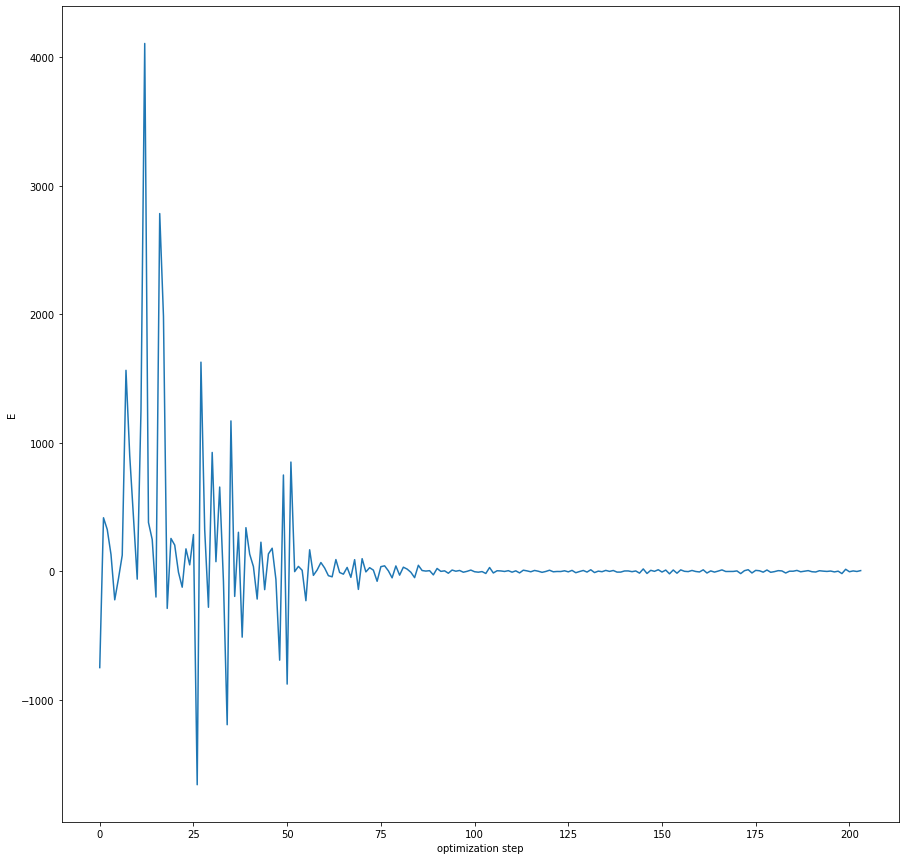

In [ ]:
v1, c1 = get_gradient(values, counts)
plt.figure(figsize=(15,15))
plt.plot(c1,v1)
plt.xlabel('optimization step')
plt.ylabel('E')
plt.show()

In [ ]:
counts = []
values = []


In [ ]:
H = (504.0 * I^I^I^I^I^I^I^Z) + (1008.0 * I^I^I^I^I^I^Z^I) +  (2016.0 * I^I^I^I^I^Z^I^I) + (504.0 * I^I^I^I^Z^I^I^I) +  (1143.7999999999997 * I^I^I^Z^I^I^I^I) +  (2287.6 * I^I^Z^I^I^I^I^I) +  (4575.200000000001 * I^Z^I^I^I^I^I^I) +  (1143.7999999999997 * Z^I^I^I^I^I^I^I) +  (98.0 * I^I^I^I^I^I^Z^Z) +  (196.0 * I^I^I^I^I^Z^I^Z) +  (392.0 * I^I^I^I^I^Z^Z^I) +  (49.0 * I^I^I^I^Z^I^I^Z) +  (98.0 * I^I^I^I^Z^I^Z^I) +  (196.0 * I^I^I^I^Z^Z^I^I) +  (93.1 * I^I^Z^Z^I^I^I^I) +  (186.2 * I^Z^I^Z^I^I^I^I) +  (372.4 * I^Z^Z^I^I^I^I^I) +  (46.55 * Z^I^I^Z^I^I^I^I) +  (93.1 * Z^I^Z^I^I^I^I^I) +  (186.2 * Z^Z^I^I^I^I^I^I)
# you can swap this for a real quantum device and keep the rest of the code the same!
# backend = AerSimulator(method='matrix_product_state')

backend = QasmSimulator()

# COBYLA usually works well for small problems like this one
optimizer = COBYLA(maxiter=2000)

# EfficientSU2 is a standard heuristic chemistry ansatz from Qiskit's circuit library
ansatz = TwoLocal(num_qubits=8, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
# set the algorithm
vqe = VQE(ansatz, optimizer, quantum_instance=backend, callback=store_intermediate_result)

#run it with the Hamiltonian we defined above
result = vqe.compute_minimum_eigenvalue(H)  

#print the result (it contains lot's of information)
print(result) 

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 255,
    'eigenstate': {   '01101111': 0.03125,
                      '01111101': 0.03125,
                      '01111111': 0.05412658773652741,
                      '11101101': 0.03125,
                      '11101111': 0.32923917977664807,
                      '11111011': 0.03125,
                      '11111101': 0.10364452469860624,
                      '11111110': 0.03125,
                      '11111111': 0.9343697742328784},
    'eigenvalue': -10965.57451171875,
    'optimal_parameters': {   ParameterVectorElement(θ[5]): -3.165102845135186,
                              ParameterVectorElement(θ[4]): 8.748449247035973,
                              ParameterVectorElement(θ[3]): 3.1491153413860373,
                              ParameterVectorElement(θ[2]): 3.2184621487031806,
                              ParameterVectorElement(θ[1]): 2.9172726271812377,
                              ParameterVectorElement(θ[0])

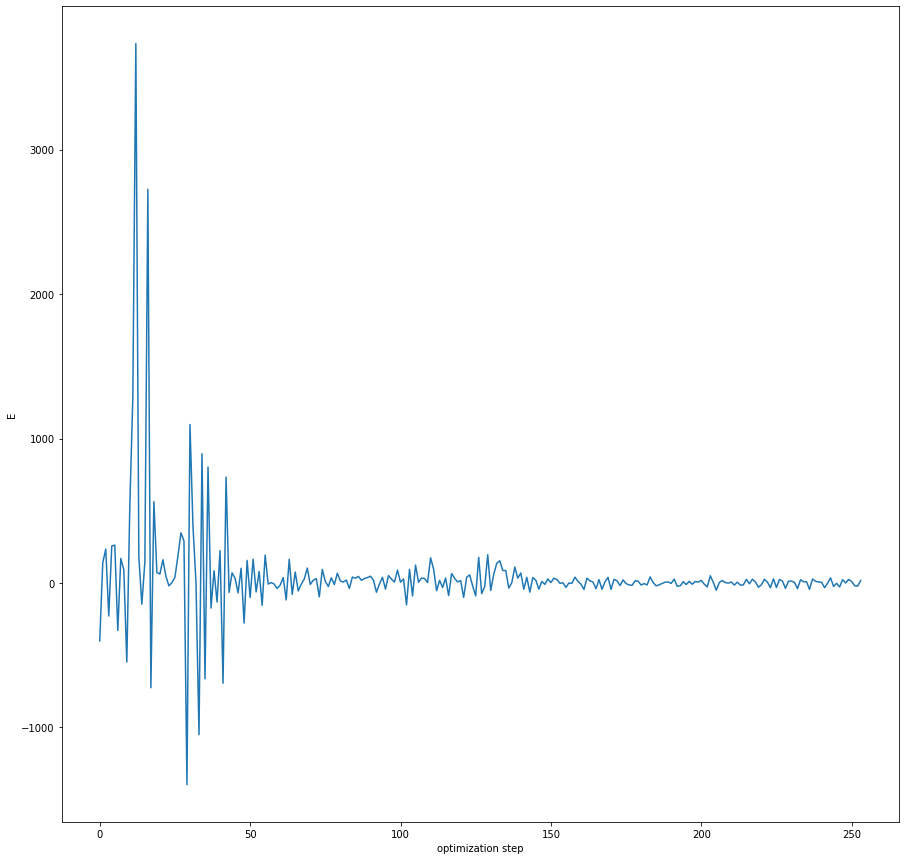

In [ ]:
v2, c2 = get_gradient(values, counts)
plt.figure(figsize=(15,15))
plt.plot(c2,v2)
plt.xlabel('optimization step')
plt.ylabel('E')
plt.show()

In [ ]:
counts = []
values = []

In [ ]:
H = (504.0 * I^I^I^I^I^I^I^Z) + (1008.0 * I^I^I^I^I^I^Z^I) + (2016.0 * I^I^I^I^I^Z^I^I) + (504.0 * I^I^I^I^Z^I^I^I) + (1143.7999999999997 * I^I^I^Z^I^I^I^I) + (2287.6 * I^I^Z^I^I^I^I^I) + (4575.200000000001 * I^Z^I^I^I^I^I^I) + (1143.7999999999997 * Z^I^I^I^I^I^I^I) + (98.0 * I^I^I^I^I^I^Z^Z)+(196.0 * I^I^I^I^I^Z^I^Z) + (392.0 * I^I^I^I^I^Z^Z^I) +  (49.0 * I^I^I^I^Z^I^I^Z) +  (98.0 * I^I^I^I^Z^I^Z^I) +  (196.0 * I^I^I^I^Z^Z^I^I) +  (93.1 * I^I^Z^Z^I^I^I^I) +  (186.2 * I^Z^I^Z^I^I^I^I)+  (372.4 * I^Z^Z^I^I^I^I^I) +  (46.55 * Z^I^I^Z^I^I^I^I) +  (93.1 * Z^I^Z^I^I^I^I^I) +  (186.2 * Z^Z^I^I^I^I^I^I)

# you can swap this for a real quantum device and keep the rest of the code the same!
# backend = AerSimulator(method='matrix_product_state')

backend = QasmSimulator()

# COBYLA usually works well for small problems like this one
optimizer = COBYLA(maxiter=2000)

# EfficientSU2 is a standard heuristic chemistry ansatz from Qiskit's circuit library
ansatz = TwoLocal(num_qubits=8, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
# set the algorithm
vqe = VQE(ansatz, optimizer, quantum_instance=backend, callback=store_intermediate_result)

#run it with the Hamiltonian we defined above
result = vqe.compute_minimum_eigenvalue(H)  

#print the result (it contains lot's of information)
print(result) 

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 214,
    'eigenstate': {   '01111110': 0.04419417382415922,
                      '01111111': 0.08267972847076846,
                      '10111110': 0.04419417382415922,
                      '10111111': 0.03125,
                      '11101111': 0.03125,
                      '11110110': 0.2049199538844375,
                      '11110111': 0.3321920566479578,
                      '11111011': 0.03125,
                      '11111110': 0.46351240544347894,
                      '11111111': 0.7868548945008857},
    'eigenvalue': -10992.766503906249,
    'optimal_parameters': {   ParameterVectorElement(θ[2]): 3.0754720787264387,
                              ParameterVectorElement(θ[0]): -2.0394715204534624,
                              ParameterVectorElement(θ[1]): 3.1508103200825435,
                              ParameterVectorElement(θ[10]): -1.6945307029822305,
                              ParameterVectorElement(θ[1

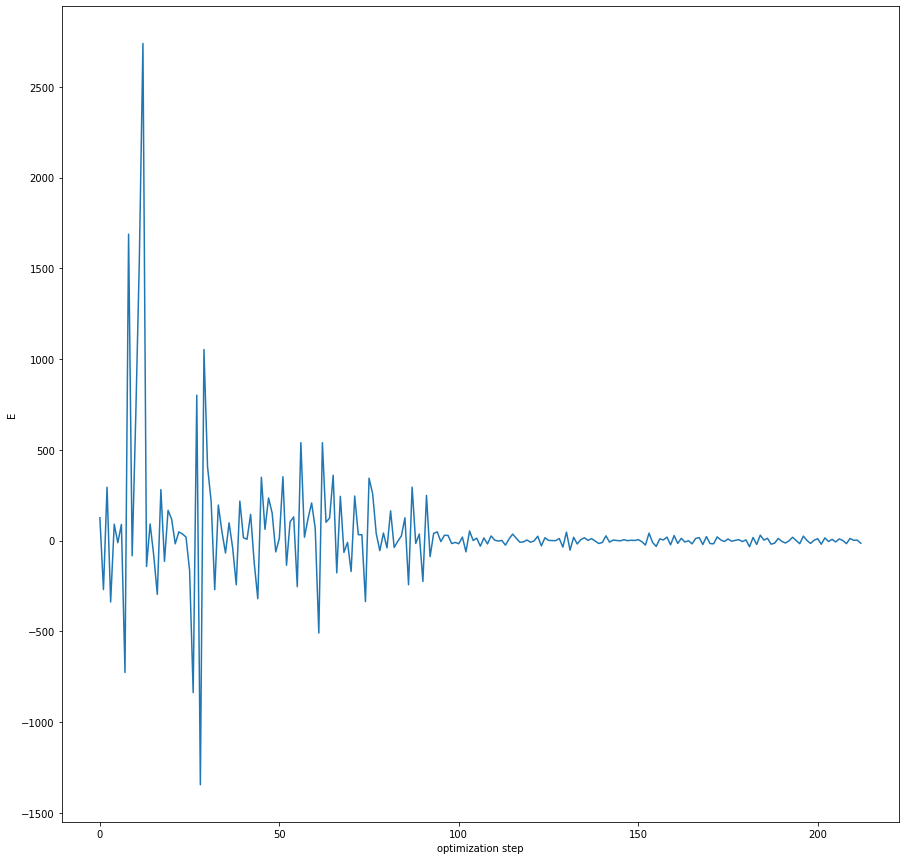

In [ ]:
v3, c3 = get_gradient(values, counts)
plt.figure(figsize=(15,15))
plt.plot(c3,v3)
plt.xlabel('optimization step')
plt.ylabel('E')
plt.show()

In [ ]:
counts = []
values = []

In [ ]:
H = (504.0 * I^I^I^I^I^I^I^Z) +  (1008.0 * I^I^I^I^I^I^Z^I) +  (2016.0 * I^I^I^I^I^Z^I^I) +  (504.0 * I^I^I^I^Z^I^I^I) +  (1143.7999999999997 * I^I^I^Z^I^I^I^I) +  (2287.6 * I^I^Z^I^I^I^I^I) +  (4575.200000000001 * I^Z^I^I^I^I^I^I) +  (1143.7999999999997 * Z^I^I^I^I^I^I^I)+  (98.0 * I^I^I^I^I^I^Z^Z) +  (196.0 * I^I^I^I^I^Z^I^Z) +  (392.0 * I^I^I^I^I^Z^Z^I) +  (49.0 * I^I^I^I^Z^I^I^Z)+  (98.0 * I^I^I^I^Z^I^Z^I)+  (196.0 * I^I^I^I^Z^Z^I^I) +  (93.1 * I^I^Z^Z^I^I^I^I)+  (186.2 * I^Z^I^Z^I^I^I^I)+  (372.4 * I^Z^Z^I^I^I^I^I)+  (46.55 * Z^I^I^Z^I^I^I^I)+  (93.1 * Z^I^Z^I^I^I^I^I)+  (186.2 * Z^Z^I^I^I^I^I^I)

# you can swap this for a real quantum device and keep the rest of the code the same!
# backend = AerSimulator(method='matrix_product_state')

backend = QasmSimulator()

# COBYLA usually works well for small problems like this one
optimizer = COBYLA(maxiter=2000)

# EfficientSU2 is a standard heuristic chemistry ansatz from Qiskit's circuit library
ansatz = TwoLocal(num_qubits=8, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
# set the algorithm
vqe = VQE(ansatz, optimizer, quantum_instance=backend, callback=store_intermediate_result)

#run it with the Hamiltonian we defined above
result = vqe.compute_minimum_eigenvalue(H)  

#print the result (it contains lot's of information)
print(result) 

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 184,
    'eigenstate': {   '11100111': 0.03125,
                      '11101110': 0.03125,
                      '11110011': 0.04419417382415922,
                      '11110110': 0.23385358667337133,
                      '11110111': 0.649519052838329,
                      '11111010': 0.03125,
                      '11111011': 0.03125,
                      '11111101': 0.05412658773652741,
                      '11111110': 0.24206145913796356,
                      '11111111': 0.6753182120304472},
    'eigenvalue': -10963.80126953125,
    'optimal_parameters': {   ParameterVectorElement(θ[7]): -3.0764720942752097,
                              ParameterVectorElement(θ[9]): -2.9562550418913713,
                              ParameterVectorElement(θ[6]): 3.1672992325151417,
                              ParameterVectorElement(θ[4]): -3.0813931010365248,
                              ParameterVectorElement(θ[8]): 2.1049877

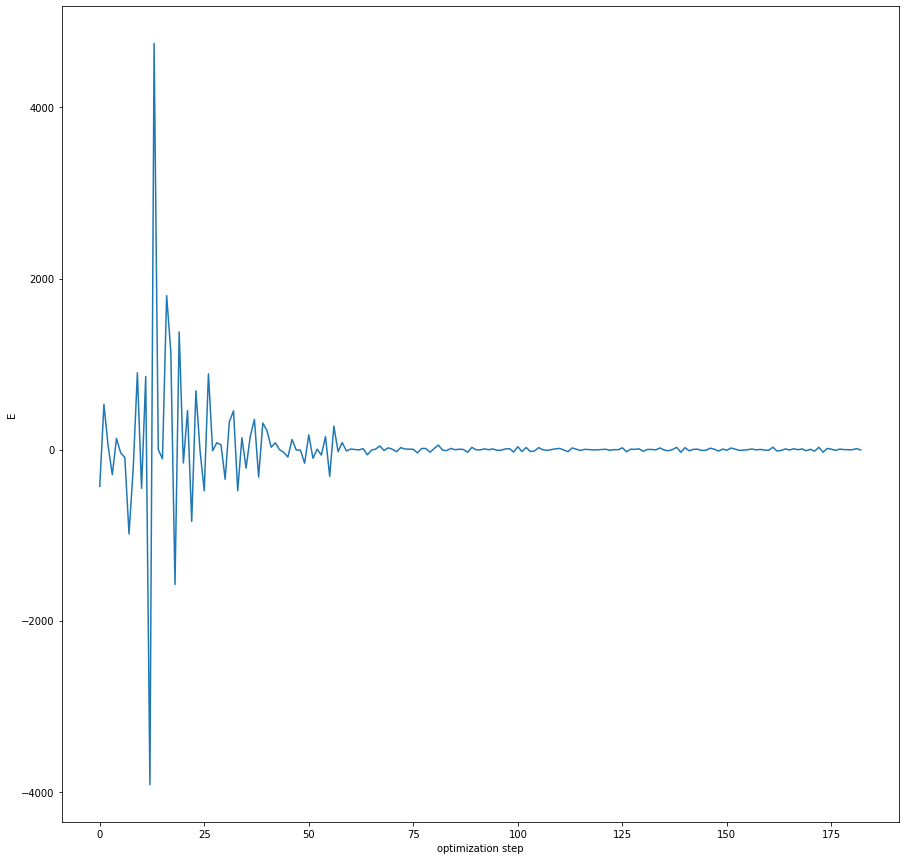

In [ ]:
v4, c4 = get_gradient(values, counts)
plt.figure(figsize=(15,15))
plt.plot(c4,v4)
plt.xlabel('optimization step')
plt.ylabel('E')
plt.show()

In [ ]:
# 2nd Order Der

v1, c1 = get_gradient(v1, c1)
v2, c2 = get_gradient(v2, c2)
v3, c3 = get_gradient(v3, c3)
v4, c4 = get_gradient(v4, c4)


In [ ]:
v1 = get_absolute(v1)
v2 = get_absolute(v2)
v3 = get_absolute(v3)
v4 = get_absolute(v4)

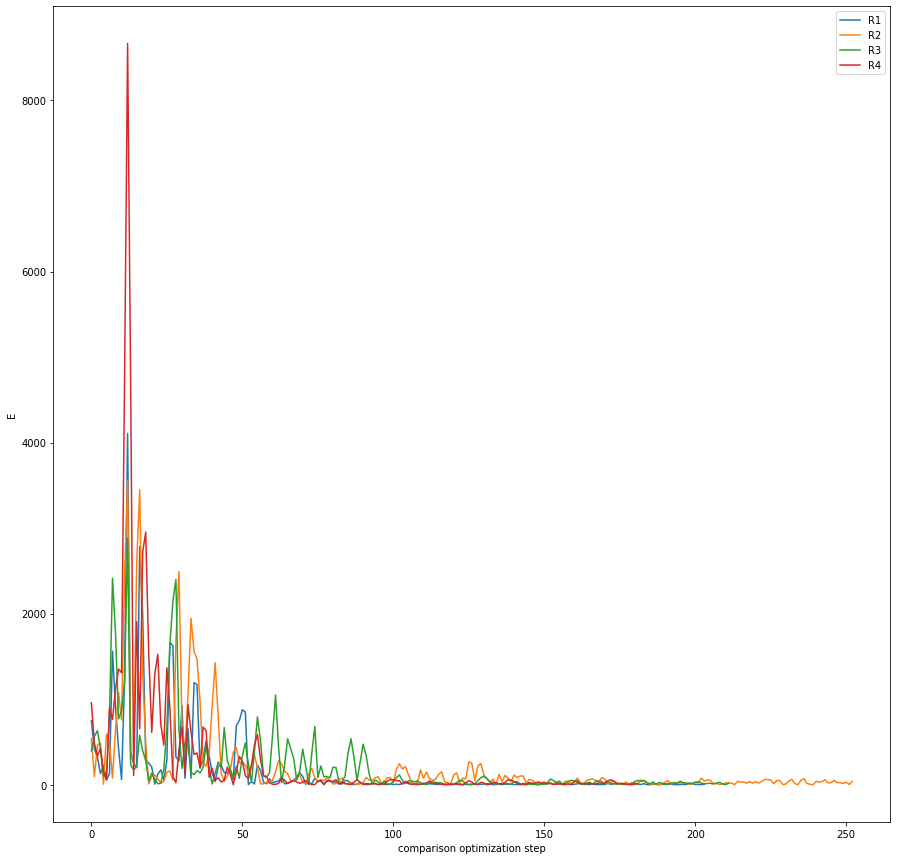

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(c1,v1, label="R1")
plt.plot(c2,v2, label="R2")
plt.plot(c3,v3, label="R3")
plt.plot(c4,v4, label="R4")
plt.xlabel('comparison optimization step')
plt.ylabel('E')
plt.legend()
plt.show()

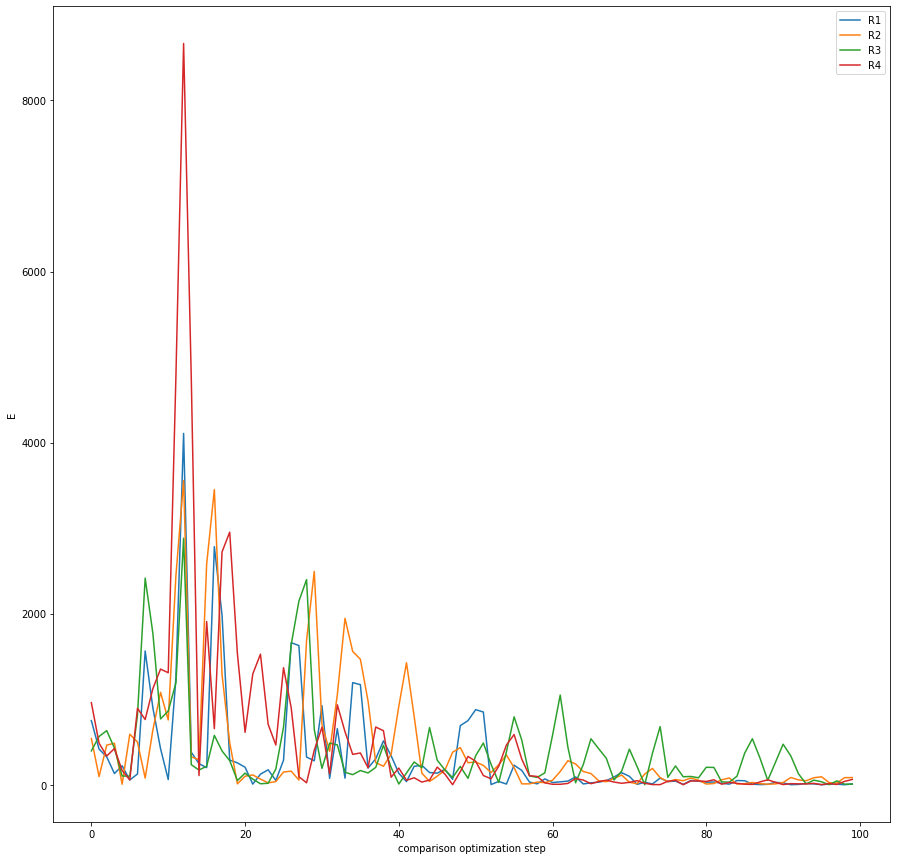

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(c1[:100],v1[:100], label="R1")
plt.plot(c2[:100],v2[:100], label="R2")
plt.plot(c3[:100],v3[:100], label="R3")
plt.plot(c4[:100],v4[:100], label="R4")
plt.xlabel('comparison optimization step')
plt.ylabel('E')
plt.legend()
plt.show()